# Section 10 
### Introduction to Data Science EN.553.436/EN.553.636 - Fall 2021
## 1. Support Vector Machines

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score

We will apply SVM methods on the breast cancer data from the sklearn datasets.
We will only focus on the first two features.

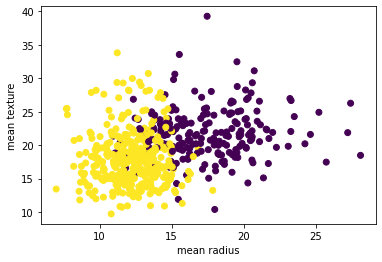

In [26]:
# load data
y = breast.target
X = breast.data[:,:2]
# make a scatter plot of the fisrt 2 features 
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel(breast['feature_names'][0])
plt.ylabel(breast['feature_names'][1])
plt.show()

### 1.1 

First perform SVM with linear kernel and C=1, and check the performance of this model by cross validation.

In [27]:
# linear kernel and C=1
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model = SVC(kernel='linear')

model.fit(X, y)
cv_score = cross_val_score(model, X, y.ravel(), cv=10)
knn_score = np.mean(cv_score)

print(f'10-fold cross validation with linear kernel: {knn_score}' )

10-fold cross validation with linear kernel: 0.8839598997493734


Plot the decision boundary and the margins.

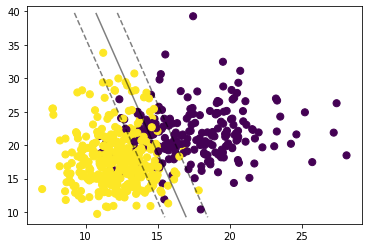

In [33]:
# Create grid to evaluate model
# xx = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
# yy = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
# plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
# plt.scatter(X[:,0], X[:,1], c=y);

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    xx = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
    yy = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
# make a scatter plot of the fisrt 2 features 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
#plot decision boundary
plot_svc_decision_function(model);


### 1.2

SVMs are often particularly powerful if combined with a suitable choice of a kernel, see for example [the documentation of SVC in scikit-learn](https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation) and [here](https://scikit-learn.org/stable/modules/svm.html#kernel-functions).

We now try different kernels that are different from the linear one: Repeat the experiment of 1.1. with a polynomial and radial basis function (RBF) kernel, with the same C=1.

In [37]:
# Polynomial kernel
model_poly = SVC(kernel='poly')
model_poly.fit(X, y)
cv_score = cross_val_score(model_poly, X, y.ravel(), cv=10)
knn_score = np.mean(cv_score)

print(f'10-fold cross validation with linear kernel: {knn_score}' )

10-fold cross validation with linear kernel: 0.8980576441102756


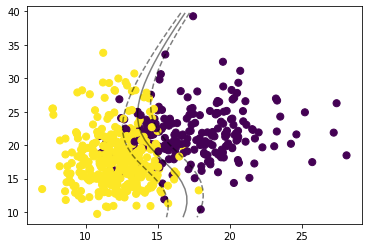

In [38]:
# plot decision boundary of polynomial kernel
# make a scatter plot of the fisrt 2 features 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
#plot decision boundary
plot_svc_decision_function(model_poly);

In [40]:
# RBF kernel
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X, y)
cv_score = cross_val_score(model_rbf, X, y.ravel(), cv=10)
knn_score = np.mean(cv_score)

print(f'10-fold cross validation with linear kernel: {knn_score}' )

10-fold cross validation with linear kernel: 0.9033208020050125


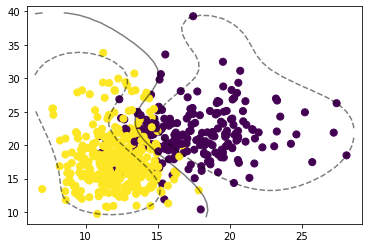

In [41]:
# plot decision boundary of rbf kernel
# make a scatter plot of the fisrt 2 features 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
#plot decision boundary
plot_svc_decision_function(model_rbf);

### 1.3 

We will show how the parameter gamma affects the SVM model with rbf kernel.

#### 1.3.1 

Repeat the same steps for `gamma='auto'`, `gamma=10`, `gamma=50`. What are the differences? <br>

#### 1.3.2 

Explain how gamma affects the model performance. <br>
- Recall that `gamma='auto'` chooses its value as $\frac{1}{\text{number of features}}$ (which is 0.5 here for only 2 features). 


10-fold cross validation with linear kernel: 0.8804197994987468


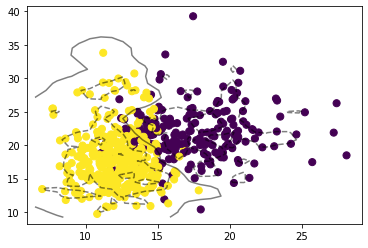

In [42]:
# RBF with gamma='auto'
model_rbf_gamma = SVC(kernel='rbf', gamma='auto')
model_rbf_gamma.fit(X, y)
cv_score = cross_val_score(model_rbf_gamma, X, y.ravel(), cv=10)
knn_score = np.mean(cv_score)

print(f'10-fold cross validation with linear kernel: {knn_score}')

# plot decision boundary of rbf kernel
# make a scatter plot of the fisrt 2 features 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
#plot decision boundary
plot_svc_decision_function(model_rbf_gamma);

10-fold cross validation with linear kernel: 0.7696741854636591


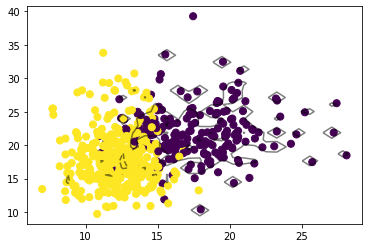

In [44]:
# RBF with gamma=10

model_rbf_gamma = SVC(kernel='rbf', gamma=10)
model_rbf_gamma.fit(X, y)
cv_score = cross_val_score(model_rbf_gamma, X, y.ravel(), cv=10)
knn_score = np.mean(cv_score)

print(f'10-fold cross validation with linear kernel: {knn_score}')

# plot decision boundary of rbf kernel
# make a scatter plot of the fisrt 2 features 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
#plot decision boundary
plot_svc_decision_function(model_rbf_gamma);

10-fold cross validation with linear kernel: 0.6502819548872181


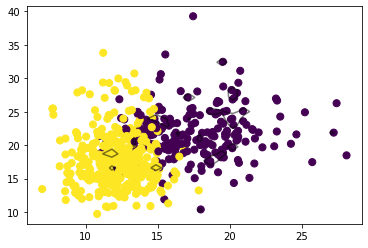

In [45]:
# RBF with gamma=50

model_rbf_gamma = SVC(kernel='rbf', gamma=50)
model_rbf_gamma.fit(X, y)
cv_score = cross_val_score(model_rbf_gamma, X, y.ravel(), cv=10)
knn_score = np.mean(cv_score)

print(f'10-fold cross validation with linear kernel: {knn_score}')

# plot decision boundary of rbf kernel
# make a scatter plot of the fisrt 2 features 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
#plot decision boundary
plot_svc_decision_function(model_rbf_gamma);


##### Answer to 1.3.2: 
When gamma increases, the SVM model overfits heavily, as the plot shows, and the cross validation scores decreases.

## 2. k-Means clustering 

### 2.1 

Perform k-Means clustering on the same dataset as above.

- Print the SSE and the clustering plot.
- Set `init='random'`.

SSE for k-Means model:  9403.76824064772


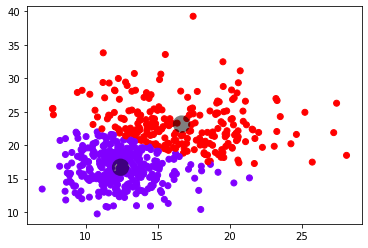

In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', n_clusters=2, n_init=100)
kmeans.fit(X)

print('SSE for k-Means model: ', kmeans.inertia_)

plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap=plt.cm.rainbow);

C = kmeans.cluster_centers_
plt.scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none')




### 2.2 Now run the k-Means for different number of clusters.


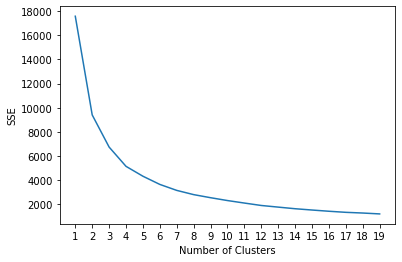

In [52]:
sse = []
L = range(1,20)
for k in L:
    kmeans = KMeans(n_clusters=k, n_init=100, init='random')
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
    
plt.plot(L, sse)
plt.xticks(L)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()   


    

4

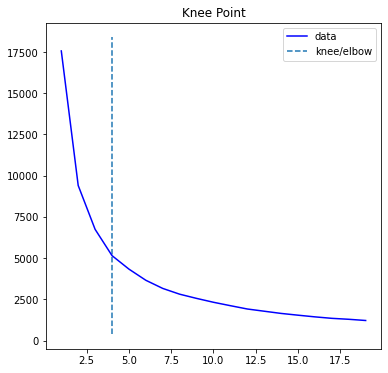

In [53]:
# find the best elbow
from kneed import KneeLocator
kl = KneeLocator(L, sse, curve="convex", direction="decreasing")


kl.plot_knee()
kl.elbow

### 2.3 

To determine the optimal choice of $k$ for our model, we implement *silhouette analysis*.

Some reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For number of clusters $k$ in range(2,15), perform and plot the average silhouette score over the range of k.
<br> 
Print the optimal k with the highest average silhouette score.

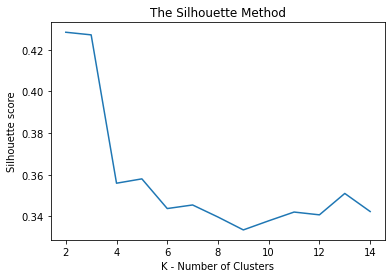

n_clusters = 2 is the best here with the average silhouette_score : 0.428451343449637


In [57]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette=[]
L = range(2,15)
for k in L:
    kmeans = KMeans(n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette.append(silhouette_avg)
    
plt.plot(L, silhouette) 
plt.xlabel('K - Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('The Silhouette Method') 
plt.show()  

sil_max = np.max(silhouette)
k_optimal = L[silhouette.index(sil_max)]
    
    
print("n_clusters =",   k_optimal    ,"is the best here with the average silhouette_score :",  sil_max   )